# Import Library yang diperlukan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# Mengimport dataset 

In [2]:
document = pd.read_csv('./data/predicted_sentiment.csv')
stopword = pd.read_csv('./data/stopwords.csv', header=None)

# Mengubah kolom 'cleaned_comment' dan data dari stopword menjadi tipe data list

In [3]:
document = document.cleaned_comment.to_list()
list_stopwords_from_csv = stopword[0].tolist()

# Mengubah teks menjadi representasi numerik

In [4]:
# Membuat objek TfidfVectorizer dengan daftar stopwords
vectorizer = TfidfVectorizer(stop_words=list_stopwords_from_csv) 

# Fit dan transformasi dokumen
X = vectorizer.fit_transform(document)

d:\Kuliah\Semester 5\Aplikasi Web\Praktikum 9\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


# Menentukan jumlah cluster optimal dengan menggunakan KMeans menggunakan metode Elbow

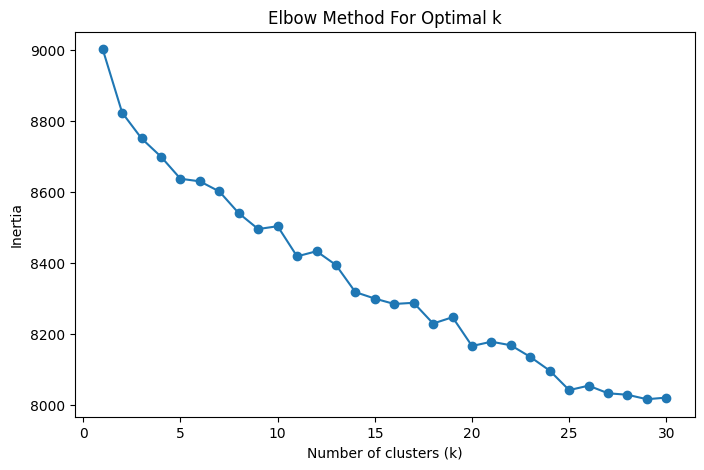

In [5]:
# List to hold the inertia values for each k
inertia_values = []

# Loop over a range of cluster numbers from 1 to 30
for k in range(1, 31):
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    model.fit(X)
    
    # Append the inertia (sum of squared distances to the nearest cluster center)
    inertia_values.append(model.inertia_)

# Plot the inertia to visualize the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 31), inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Karena terjadi penurunan tajam pada inertia hingga k=14, dan terjadi penurunan yang lebih lambat. Maka k=14 adalah jumlah klaster optimal.

# Melakukan klastering sesuai dengan jumlah klaster optimal

In [12]:
true_k = 14
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=14, n_init=1)

# Menampilkan kata-kata yang paling berpengaruh atau dominan di setiap klaster

In [13]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# get_feature_names is deprecated in scikit-learn versions >= 0.2
# and replaced by get_feature_names_out
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()

Cluster 0:
 best
 gibran
 mas
 yes
 far
 idol
 pragib
 prabowonya
 next
 mantab

Cluster 1:
 mantap
 gibran
 pilih
 mas
 mahfud
 nomor
 dukung
 sdh
 prabowo
 gibrannnn

Cluster 2:
 intonasi
 skripsi
 sidang
 cok
 gibran
 dosen
 asa
 uji
 mafud
 gaya

Cluster 3:
 muda
 anak
 gibran
 maju
 panggil
 paman
 mas
 tua
 cerdas
 indonesia

Cluster 4:
 debat
 cawapres
 capres
 lihat
 gibran
 kali
 paslon
 pilih
 liat
 mas

Cluster 5:
 gibran
 dukung
 aja
 mahfud
 janji
 prabowo
 orang
 indonesia
 kerja
 keren

Cluster 6:
 hebat
 gibran
 mas
 muda
 cawapres
 anak
 debat
 gibrann
 cerdas
 orang

Cluster 7:
 slepet
 slepat
 sih
 muhaimin
 imin
 wkwk
 mulu
 kena
 min
 nih

Cluster 8:
 pilih
 amin
 prabowo
 gibran
 anis
 salah
 nomor
 moga
 jokowi
 paslon

Cluster 9:
 gibran
 prabowo
 pilih
 dukung
 ragu
 keren
 maju
 hati
 indonesia
 hidup

Cluster 10:
 menang
 putar
 gibran
 prabowo
 telak
 moga
 amin
 debat
 mas
 dukung

Cluster 11:
 imin
 cak
 mahfud
 anis
 ngomong
 gibran
 slepet
 sih
 dukung
 

# Memberikan hasil klastering yang dihasilkan oleh model KMeans (Evaluasi)

In [14]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels=model.predict(X))

# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
# Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

np.float64(0.02906623991852137)

# Mengurangi dimensi fitur yang lebih tinggi menjadi dua dimensi

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

# Memvisualisasi klaster

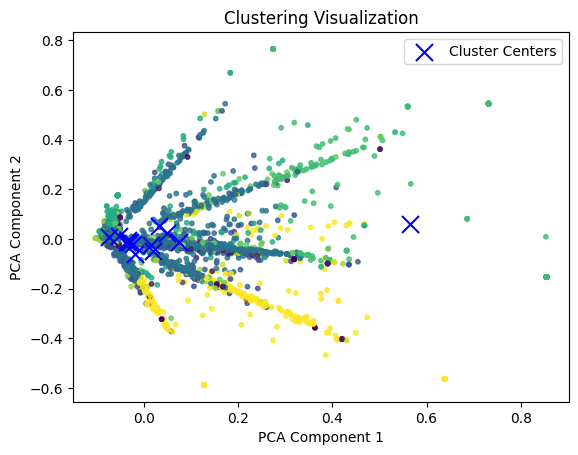

In [16]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], 
            c=model.predict(X),  
            s=10,
            marker='o',
            alpha=0.8)

# Plot cluster centers
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:, 1], 
            marker='x', 
            s=150, 
            c='b', 
            label='Cluster Centers')

plt.title('Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


# Menyimpan data yang dikelompokkan ke bentuk file csv

In [11]:
document = pd.DataFrame(document, columns=['cleaned_comment'])
document['cluster'] = model.predict(X)

# Save the clustered data to CSV
document.to_csv('./data/clustered_comments.csv', index=False)